## 1. Importing Libraries
We begin by importing essential Python libraries for data handling and visualization.


In [1]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset
We load the training and test datasets provided by the "Give Me Some Credit" competition.


In [2]:
# Loading the training and test datasets  


train_df = pd.read_csv("/kaggle/input/training-set-give-me-credit-project/cs-training.csv")
test_df = pd.read_csv("/kaggle/input/test-set-give-me-credit-project/cs-test.csv")

## 3. Viewing Column Names
Checking available features in the training dataset.


In [3]:
print(train_df.columns)


Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


## 4. Balancing the Dataset
We apply random under-sampling to address class imbalance in the target variable.


In [3]:
# Balancing the training dataset using Random Under-Sampling  
# Ensures equal representation of default (1) and non-default (0) cases in the target variable (`SeriousDlqin2yrs`)  
# Maintains reproducibility with a fixed random state  




from imblearn.under_sampling import RandomUnderSampler     

rus = RandomUnderSampler(random_state = 42) 
X_balanced, y_balanced, = rus.fit_resample(train_df.drop(columns=['SeriousDlqin2yrs']), train_df['SeriousDlqin2yrs']) 


balanced_sample_df = pd.concat([X_balanced, y_balanced], axis=1)

## 5. Summary Statistics of Balanced Data
We inspect the basic statistics of the balanced dataset to check distributions.


In [ ]:
balanced_sample_df.describe()

## 6. Feature Correlation Heatmap
We generate a correlation heatmap to observe relationships between features. Most features show weak correlation with the target variable `SeriousDlqin2yrs`, indicating that non-linear models may perform better. Some features (e.g., past due metrics) are highly correlated with each other, which could signal multicollinearity.


<Axes: >

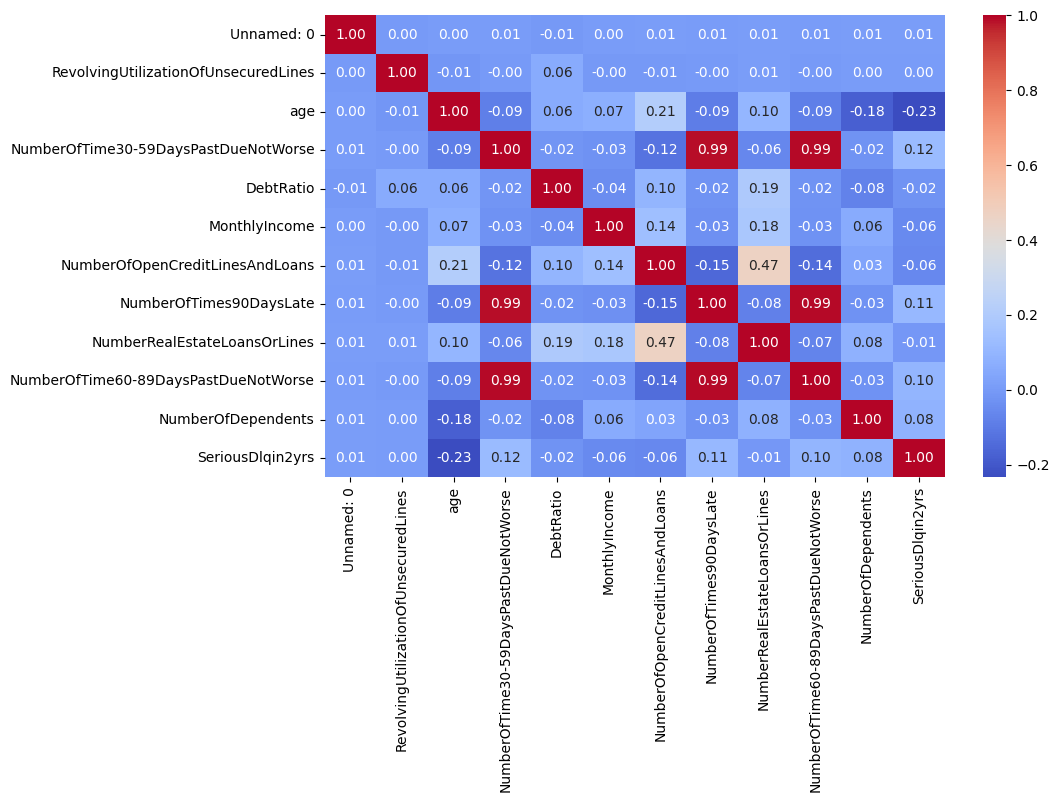

In [29]:
# Generating a heatmap to visualize correlations between features  
# Provides insights into feature relationships, aiding feature selection and understanding potential multicollinearity  



plt.figure(figsize=(10,6))
sns.heatmap(balanced_sample_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

## 7. Age Feature Distribution
We plot the distribution of the `age` feature. It appears fairly balanced with no extreme outliers, indicating it's suitable for modeling without transformation.


<Axes: >

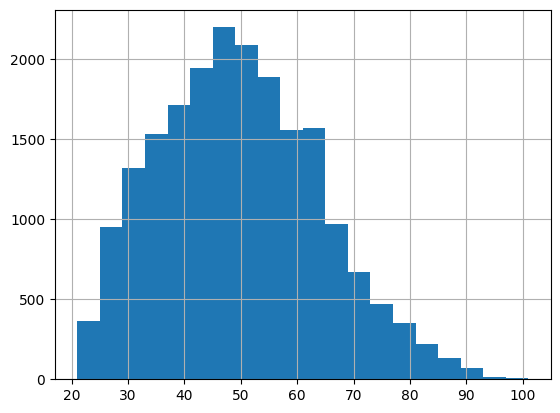

In [30]:
# Plotting the distribution of the 'age' feature  
# The distribution appears fairly balanced with no extreme outliers, indicating the feature is suitable for modeling without transformation  



balanced_sample_df['age'].hist(bins=20)


## 8. Distribution of 30–59 Days Past Due
This feature is extremely right-skewed, with most values at zero and a long tail of late payments. Outliers may need to be capped or transformed before modeling.


<Axes: >

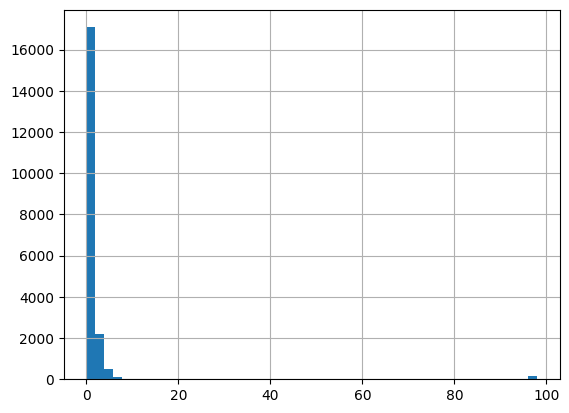

In [31]:
balanced_sample_df['NumberOfTime30-59DaysPastDueNotWorse'].hist(bins=50)

## 8. Distribution of 30–59 Days Past Due
This feature is extremely right-skewed, with most values at zero and a long tail of late payments. Outliers may need to be capped or transformed before modeling.


In [32]:
balanced_sample_df.query('`NumberOfTime30-59DaysPastDueNotWorse` > 97')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
77220,77221,1.0,25,98,0.000000,1958.0,0,98,0,98,0.0,0
65620,65621,1.0,23,98,0.000000,NaN,0,98,0,98,NaN,0
18483,18484,1.0,26,98,0.000000,2305.0,0,98,0,98,0.0,0
141071,141072,1.0,24,98,0.000000,750.0,0,98,0,98,0.0,0
117887,117888,1.0,31,98,0.000000,NaN,0,98,0,98,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
147128,147129,1.0,37,98,0.007578,3166.0,0,98,0,98,0.0,1
147258,147259,1.0,25,98,0.000000,NaN,0,98,0,98,NaN,1
147774,147775,1.0,68,98,255.000000,NaN,0,98,0,98,0.0,1
149153,149154,1.0,24,98,54.000000,NaN,0,98,0,98,0.0,1


## 10. Removing Outliers from 30–59 Days Past Due
Rows with values >15 are dropped to reduce skew and improve data quality.


In [4]:
# Removing outliers from the 'NumberOfTime30-59DaysPastDueNotWorse' feature  
# Rows with values above 15 are dropped, as they are few and considered outliers  
# Ensures the dataset remains clean and free from extreme values that could skew results  



balanced_sample_df= balanced_sample_df[balanced_sample_df['NumberOfTime30-59DaysPastDueNotWorse'] <= 15] 


## 11. Boxplot of Revolving Utilization
This feature shows extreme outliers (values > 8000), suggesting a need for capping or transformation.


<Axes: >

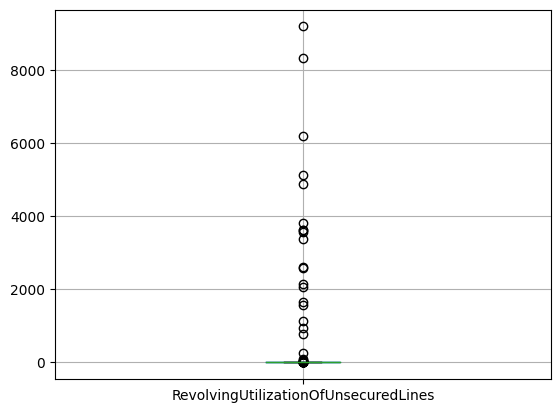

In [84]:
# Using a boxplot to visualize the distribution of 'RevolvingUtilizationOfUnsecuredLines'  
# Helps identify outliers and understand the spread of this feature  


balanced_sample_df.boxplot(column='RevolvingUtilizationOfUnsecuredLines')



## 12. Checking Outliers in Revolving Utilization
We count entries where `RevolvingUtilizationOfUnsecuredLines` > 100 to assess the extent of extreme values.


In [35]:
# Querying to count rows where 'RevolvingUtilizationOfUnsecuredLines' exceeds 100  
# Helps assess the prevalence of extreme values in this feature 

balanced_sample_df.query('RevolvingUtilizationOfUnsecuredLines > 100').count() 

Unnamed: 0                              20
RevolvingUtilizationOfUnsecuredLines    20
age                                     20
NumberOfTime30-59DaysPastDueNotWorse    20
DebtRatio                               20
MonthlyIncome                           16
NumberOfOpenCreditLinesAndLoans         20
NumberOfTimes90DaysLate                 20
NumberRealEstateLoansOrLines            20
NumberOfTime60-89DaysPastDueNotWorse    20
NumberOfDependents                      20
SeriousDlqin2yrs                        20
dtype: int64

## 13. Removing Revolving Utilization Outliers
We remove rows with values above 100 to reduce distortion and improve model accuracy.


In [5]:
# Removing rows where 'RevolvingUtilizationOfUnsecuredLines' exceeds 100  
# Ensures the feature remains within a reasonable range, improving model reliability  



balanced_sample_df = balanced_sample_df[balanced_sample_df['RevolvingUtilizationOfUnsecuredLines' ] <= 100]

## 14. Debt Ratio Distribution
This feature is extremely right-skewed, with several extreme outliers. Scaling or capping may be needed.


<Axes: >

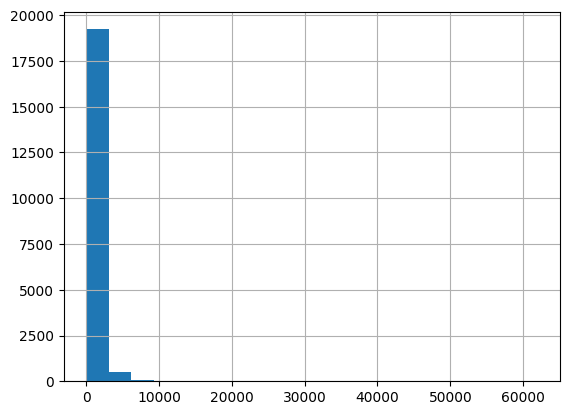

In [37]:
# Plotting the distribution of the 'DebtRatio' feature  
# Helps visualize its spread and detect any potential outliers or skewness  



balanced_sample_df['DebtRatio'].hist(bins=20)

## 15. Debt Ratio Boxplot
The boxplot confirms the presence of large outliers (some > 60,000), which could distort model training.


<Axes: >

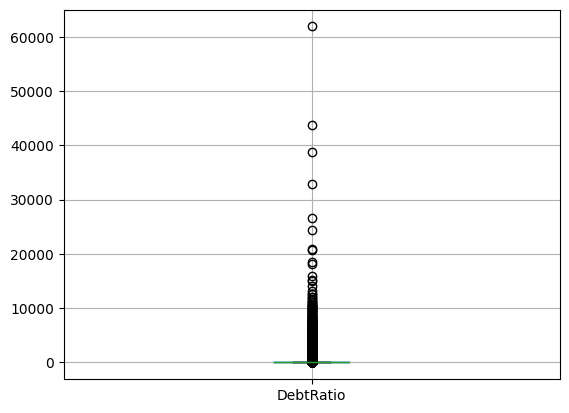

In [38]:
# Using a boxplot to analyze the distribution of 'DebtRatio'  
# Highlights outliers and provides a clear view of the feature's spread  

balanced_sample_df.boxplot(column='DebtRatio')

## 16. Investigating Debt Ratio Outliers
We examine rows where `DebtRatio` > 3. These values are unrealistic for a ratio and often occur with missing `MonthlyIncome`, suggesting data quality issues.


In [39]:
# Check for unrealistic DebtRatio values that may indicate data issues

balanced_sample_df.query('DebtRatio > 3')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
17636,17637,0.146315,51,0,1066.00000,1.0,12,0,2,0,2.0,0
142189,142190,0.527285,53,0,4750.00000,NaN,10,0,1,0,0.0,0
122145,122146,0.291932,69,0,1262.00000,NaN,9,0,1,0,0.0,0
84070,84071,0.368450,72,0,3072.00000,NaN,12,0,1,0,0.0,0
47888,47889,1.000000,29,1,233.00000,NaN,1,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
149794,149795,1.000000,44,3,2826.00000,NaN,8,3,1,1,0.0,1
149897,149898,1.019967,41,1,1456.00000,NaN,4,0,1,0,0.0,1
149924,149925,0.673699,62,1,3653.00000,NaN,16,0,1,0,1.0,1
149940,149941,0.847041,47,0,432.00000,NaN,6,0,0,0,0.0,1


## 17. Removing Invalid Debt Ratio Rows
Entries with `DebtRatio` > 3 are dropped to maintain logical consistency in the data.


In [6]:
# Drop rows with invalidly high debt ratios

balanced_sample_df = balanced_sample_df[~((balanced_sample_df['DebtRatio'] > 3))]

## 18. Dataset Overview
We inspect column types and missing values after cleaning.


In [41]:
balanced_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16218 entries, 146079 to 149979
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            16218 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  16218 non-null  float64
 2   age                                   16218 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  16218 non-null  int64  
 4   DebtRatio                             16218 non-null  float64
 5   MonthlyIncome                         15998 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       16218 non-null  int64  
 7   NumberOfTimes90DaysLate               16218 non-null  int64  
 8   NumberRealEstateLoansOrLines          16218 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  16218 non-null  int64  
 10  NumberOfDependents                    16172 non-null  float64
 11  SeriousDlqin2y

## 19. Finalizing Cleaned Dataset
We rename the cleaned dataset to `sample_df` and preview the first few rows.


In [7]:
# Renaming cleaned dataset for easier reference




sample_df = balanced_sample_df
sample_df.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
146079,146080,0.082504,47,0,0.252994,8600.0,7,0,1,0,3.0,0
41663,41664,0.050834,41,0,0.007679,8333.0,2,0,0,0,0.0,0
123020,123021,0.079565,80,0,0.024163,6000.0,8,0,0,0,1.0,0
112973,112974,0.202477,48,0,0.235627,9200.0,10,0,1,0,0.0,0
57139,57140,0.923077,24,0,0.010796,2500.0,1,0,0,0,0.0,0


## 20. Monthly Income Boxplot
We observe extreme outliers in `MonthlyIncome`, with some values exceeding 800,000. These may need to be capped or log-transformed.


<Axes: >

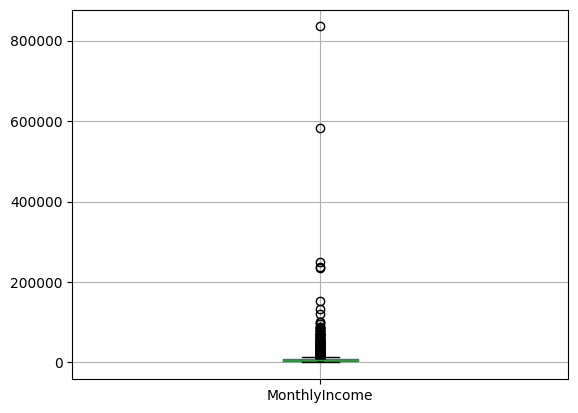

In [43]:
# Visualize income spread and detect extreme outliers


sample_df.boxplot(column ='MonthlyIncome')

## 21. Monthly Income Distribution
The histogram shows a highly right-skewed distribution with extreme outliers, consistent with the boxplot. A log transformation may improve model performance.


<Axes: >

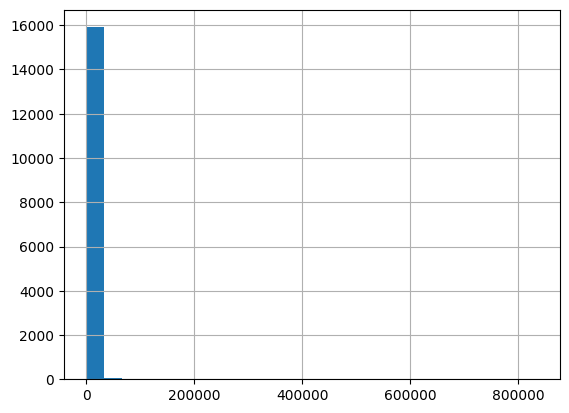

In [44]:
# Plot income distribution to assess skew and outliers

sample_df['MonthlyIncome'].hist(bins=25)

## 22. Inspecting High-Income Entries
We filter rows with `MonthlyIncome` > 20,000 to review potential outliers. Some may be valid, but values above 50,000 could be anomalies worth capping.


In [45]:
sample_df.query('MonthlyIncome > 20000')

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
142886,142887,0.135813,66,0,0.631620,28000.0,16,0,9,0,0.0,0
112934,112935,0.911758,67,0,0.865500,20750.0,53,0,5,0,3.0,0
135695,135696,0.004875,44,0,0.116916,24786.0,9,0,1,0,0.0,0
144098,144099,0.039180,61,1,0.358676,32000.0,13,0,6,0,0.0,0
146143,146144,0.495615,60,1,0.026269,21583.0,3,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
142797,142798,0.261885,44,0,0.351566,32633.0,10,0,3,0,3.0,1
142894,142895,0.782628,49,0,0.234640,21500.0,11,0,1,0,2.0,1
144924,144925,0.194812,39,2,0.368755,26000.0,14,0,4,0,2.0,1
148261,148262,0.025302,39,0,0.285174,50000.0,15,0,5,0,2.0,1


## 23. Removing Monthly Income Outliers
We remove entries with `MonthlyIncome` > 20,000 to prevent extreme values from skewing model results.


In [8]:
# Remove income values above 20,000 to limit skew

outliers_monthlyincome = sample_df[sample_df['MonthlyIncome'] > 20000].index

sample_df = sample_df.drop(outliers_monthlyincome)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


## 24. Exploring Mid-Level Income Outliers
We examine entries with `MonthlyIncome` > 10,000 to assess whether a lower cap might be more appropriate than 20,000.
📌 Note: We explored `MonthlyIncome` extensively due to its common importance in credit scoring and the presence of heavy skew and extreme outliers in this feature.




In [47]:
# Re-check income values between 10,000–20,000 for better outlier threshold

sample_df.query('MonthlyIncome > 10000')

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
64788,64789,0.088799,66,0,0.494121,10800.0,11,0,3,0,0.0,0
115786,115787,0.007378,49,0,0.038903,11489.0,5,0,0,0,4.0,0
49882,49883,0.000000,46,0,0.298147,11064.0,7,0,2,0,1.0,0
115049,115050,0.530823,60,0,0.523043,11000.0,15,0,3,0,1.0,0
10741,10742,0.010444,56,0,0.201962,13249.0,10,0,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
149168,149169,1.034183,51,1,0.251655,12083.0,3,0,1,1,1.0,1
149452,149453,0.798931,46,1,0.794058,10400.0,15,1,6,0,3.0,1
149641,149642,0.932006,60,1,0.567600,10073.0,17,0,3,0,0.0,1
149841,149842,0.009088,54,0,1.061506,11250.0,12,0,4,0,0.0,1


## 25. Distribution of Open Credit Lines and Loans
The distribution is right-skewed, with most individuals holding under 15 accounts. A few have more than 30, which may be outliers.


<Axes: >

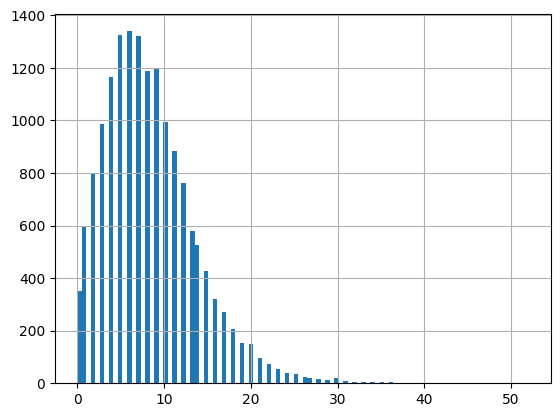

In [48]:
# Plot credit line count to detect skew and potential outliers

sample_df['NumberOfOpenCreditLinesAndLoans'].hist(bins = 100) 

## 26. Boxplot of Open Credit Lines and Loans
The boxplot confirms many outliers above 20 accounts. These high values may reflect unusual financial behavior or reporting issues.


<Axes: >

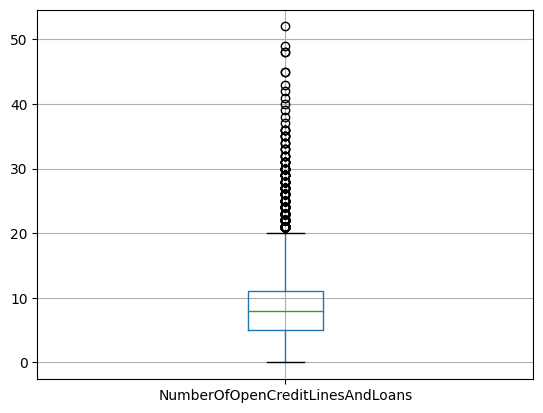

In [49]:
sample_df.boxplot(column = 'NumberOfOpenCreditLinesAndLoans') 


## 26. Boxplot of Open Credit Lines and Loans
The boxplot confirms many outliers above 20 accounts. These high values may reflect unusual financial behavior or reporting issues.


In [50]:
# Identify outliers in number of open credit lines
sample_df.query('NumberOfOpenCreditLinesAndLoans > 20')

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
9543,9544,0.345169,59,1,0.740315,4439.0,23,0,1,0,1.0,0
2247,2248,0.141189,37,0,0.596839,6200.0,22,0,2,0,1.0,0
59560,59561,0.127515,59,0,0.179082,10000.0,21,0,1,0,1.0,0
122672,122673,0.270972,55,0,0.733652,4816.0,25,0,2,0,0.0,0
89068,89069,0.596745,64,0,0.353682,20000.0,22,0,2,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
145943,145944,1.026993,53,3,0.265767,5707.0,21,1,0,1,1.0,1
146345,146346,1.000486,42,1,0.521791,8351.0,21,0,1,0,3.0,1
147149,147150,0.005973,53,0,0.223347,8000.0,25,0,2,0,0.0,1
148573,148574,0.373138,60,2,0.330010,7020.0,21,0,1,0,3.0,1


## 27. Removing Outliers in Open Credit Lines
We drop rows with more than 20 open credit lines to reduce noise and ensure consistency.


In [9]:
# Remove rows with unusually high number of credit lines (> 20)

outliers_opencreditlines = sample_df[sample_df['NumberOfOpenCreditLinesAndLoans'] > 20].index
sample_df = sample_df.drop(outliers_opencreditlines)


## 28. Distribution of 90-Day Late Payments
This feature is heavily right-skewed with the majority of values at zero. A few entries have more than 10 late payments, indicating outliers.


<Axes: >

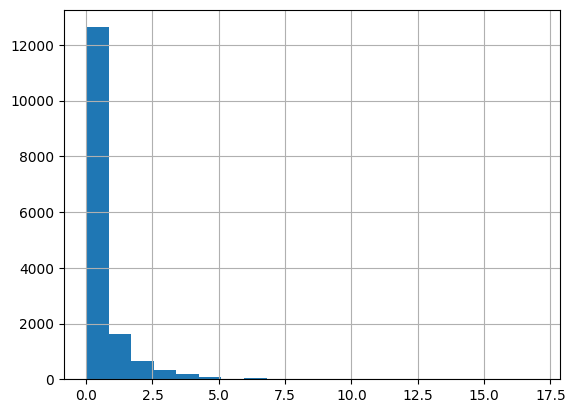

In [52]:
# Plot 90-day late payments to assess skew and identify outliers

sample_df['NumberOfTimes90DaysLate'].hist(bins = 20)

## 29. Boxplot of 90-Day Late Payments
The boxplot reveals strong right-skew and several extreme outliers. Most values are near zero, but some exceed 15.


<Axes: >

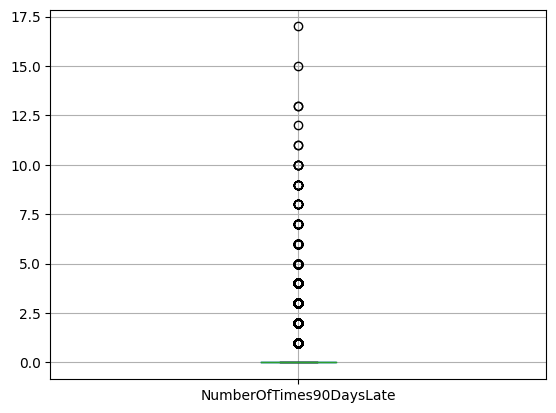

In [53]:
# Visualize outliers in 90-day late payments
sample_df.boxplot(column = 'NumberOfTimes90DaysLate')

## 30. Inspecting Extreme Late Payment Entries
We filter rows with over 10 instances of 90-day lateness. These cases likely indicate data entry errors or highly risky profiles.


In [54]:
# Check entries with very high 90-day late counts
sample_df.query('NumberOfTimes90DaysLate > 10')  

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
30676,30677,1.000000,32,1,0.099485,3879.0,2,15,0,0,3.0,0
103333,103334,0.610310,62,0,0.237690,2700.0,7,17,0,0,0.0,1
119677,119678,1.158277,50,1,0.718715,4514.0,9,11,1,1,1.0,1
121148,121149,0.968004,43,2,0.816412,5751.0,12,11,5,1,0.0,1
129497,129498,0.860175,50,2,0.394331,7125.0,8,13,3,0,1.0,1
137309,137310,1.550759,45,3,0.268878,6541.0,6,13,0,1,0.0,1
143769,143770,0.822943,34,1,0.362611,11077.0,12,12,3,5,0.0,1


## 31. Removing Outliers in 90-Day Late Payments
We remove entries with more than 10 occurrences of 90-day lateness to reduce the influence of extreme behavior or errors.


In [10]:
# Remove rows with >10 instances of 90-day late payments

outliers_90dayslate = sample_df[sample_df['NumberOfTimes90DaysLate'] > 10].index  
sample_df = sample_df.drop(outliers_90dayslate)

## 32. Distribution of Real Estate Loans
Most individuals have 0–2 real estate loans, with very few having more than 5. The distribution is right-skewed but mostly within a reasonable range.


<Axes: >

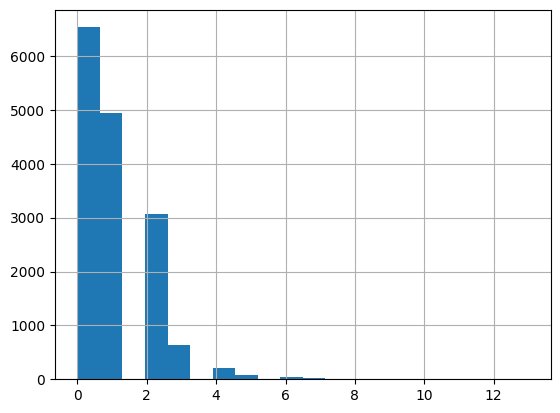

In [55]:
# Examine distribution of real estate loans to detect possible outliers
sample_df['NumberRealEstateLoansOrLines'].hist(bins=20)

## 33. Boxplot of Real Estate Loans
Outliers above 6 are visible, but most values are concentrated between 0 and 2, confirming the earlier histogram insight.


<Axes: >

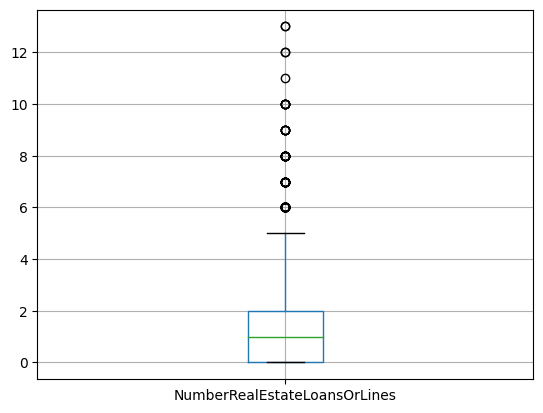

In [56]:
# Boxplot to detect outliers in real estate loan counts
sample_df.boxplot(column='NumberRealEstateLoansOrLines')

## 34. Querying High Real Estate Loan Counts
We investigate rows with more than 5 real estate loans, which may represent anomalies or rare profiles.


In [57]:
# Inspect rows with more than 5 real estate loans

sample_df.query('NumberRealEstateLoansOrLines> 5')

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
41903,41904,0.009357,40,0,0.547626,16030.0,19,0,6,0,1.0,0
70148,70149,0.006613,46,0,0.616022,12195.0,17,0,7,0,0.0,0
83373,83374,0.284371,55,0,1.096686,12100.0,20,0,6,0,3.0,0
11517,11518,0.006730,64,0,2.072070,10697.0,15,0,11,0,0.0,0
17352,17353,0.156172,51,0,0.457677,20000.0,9,0,6,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
142226,142227,0.859714,55,0,0.599348,11046.0,18,7,6,6,1.0,1
143815,143816,0.029308,57,0,0.644702,9560.0,19,0,6,0,0.0,1
145632,145633,0.938027,41,1,0.614992,14900.0,20,0,10,0,1.0,1
148118,148119,0.904568,49,2,2.158907,3586.0,16,0,6,0,0.0,1


## 35. Capping Real Estate Loan Counts
To reduce the influence of outliers, values above 5 are capped. This preserves overall distribution while minimizing skew.


In [11]:
# Cap real estate loan counts at 5 to limit extreme values
sample_df['NumberRealEstateLoansOrLines'] = sample_df['NumberRealEstateLoansOrLines'].clip(upper=5) 

## 36. Boxplot: 60–89 Days Past Due
Visualizes outliers in the `NumberOfTime60-89DaysPastDueNotWorse` feature. Outliers will likely be capped or removed to stabilize the dataset.


<Axes: >

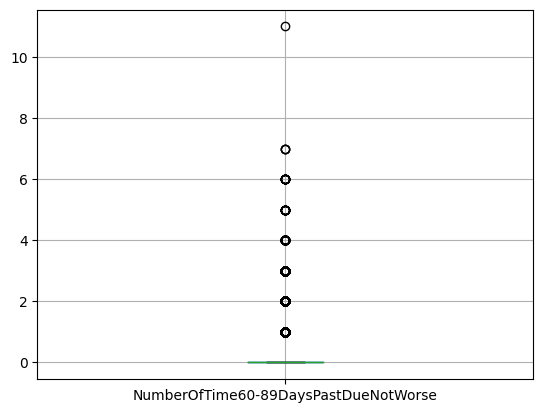

In [59]:
sample_df.boxplot(column = 'NumberOfTime60-89DaysPastDueNotWorse' )

## 36. Boxplot: 60–89 Days Past Due
Visualizes outliers in the `NumberOfTime60-89DaysPastDueNotWorse` feature. Outliers will likely be capped or removed to stabilize the dataset.


<Axes: >

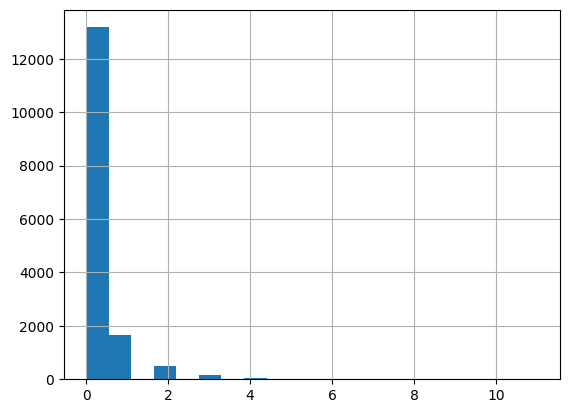

In [60]:
# Boxplot to assess outliers in 60–89 day delinquency feature
sample_df['NumberOfTime60-89DaysPastDueNotWorse'].hist(bins = 20)

## 37. Investigating 60–89 Day Delinquencies
Queried rows where the 60–89 day past due count exceeds 3. These are likely outliers and candidates for removal to ensure data consistency.


In [61]:
# Checking rows with excessive 60–89 day delinquencies

sample_df.query('`NumberOfTime60-89DaysPastDueNotWorse` > 3' )

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
79611,79612,0.878672,38,1,0.175059,4666.0,4,2,0,5,0.0,0
67166,67167,0.835224,50,5,0.408352,5291.0,12,2,2,4,0.0,0
125764,125765,0.982084,44,1,0.077482,14583.0,6,0,0,4,2.0,0
104856,104857,0.773150,54,8,0.293506,13750.0,14,1,1,4,4.0,0
60383,60384,0.980072,72,3,0.647735,4700.0,7,2,1,4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
142357,142358,2.297612,42,1,0.806048,4000.0,8,2,1,4,0.0,1
143769,143770,0.822943,34,1,0.362611,11077.0,12,12,3,5,0.0,1
146084,146085,0.999301,56,4,0.173376,3725.0,7,1,0,4,0.0,1
146466,146467,0.767116,52,1,0.721562,5300.0,12,3,2,4,1.0,1


## 38. Removing 60–89 Day Delinquency Outliers
Dropped rows where the 60–89 day delinquency count exceeded 3 to reduce noise and maintain modeling integrity.


In [12]:
# Identifying and removing rows where 'NumberOfTime60-89DaysPastDueNotWorse' exceeds 3  
# Ensures the dataset remains clean and free of extreme values for better modeling  

outliers_60to89dayslate = sample_df[sample_df['NumberOfTime60-89DaysPastDueNotWorse'] > 3].index  

sample_df = sample_df.drop(outliers_60to89dayslate)

# 39. Visualizing the distribution of 'NumberOfDependents'  
Helps identify common values and spot potential outliers


<Axes: >

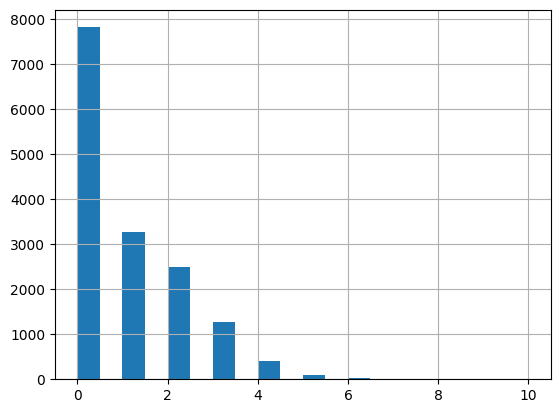

In [63]:
sample_df['NumberOfDependents'].hist(bins = 20)

## 40. Outlier Detection in Number of Dependents  
The boxplot reveals outliers above 5 dependents. These may be rare cases and could impact model generalization.


<Axes: >

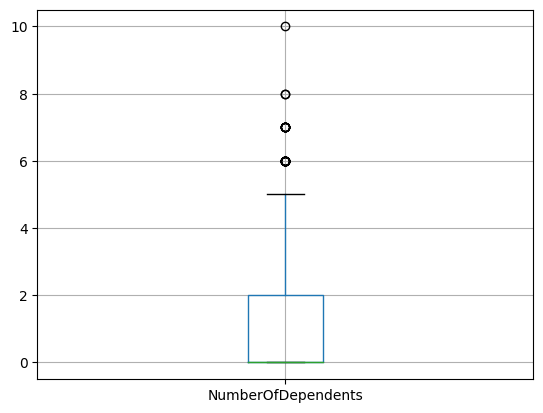

In [64]:
# Boxplot to highlight outliers in 'NumberOfDependents'
sample_df.boxplot(column = 'NumberOfDependents' )

## 41. Capping Number of Dependents  
Capped values above 4 to reduce the influence of outliers while preserving most of the distribution.


In [13]:
# Capping 'NumberOfDependents' at 4 to limit outlier influence
sample_df['NumberOfDependents'] = sample_df['NumberOfDependents'].clip(upper=4)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


## 42. Identifying Missing Values  
Checked the dataset for missing values to pinpoint features that require imputation—specifically `MonthlyIncome` and `NumberOfDependents`.


In [66]:
# Checking for missing values in the dataset  
# Helps identify features requiring imputation or further cleaning  
sample_df.isnull().sum()

Unnamed: 0                                0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           220
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                       46
SeriousDlqin2yrs                          0
dtype: int64

## 43. Imputing Missing Values with Median  
Filled missing values in `MonthlyIncome` and `NumberOfDependents` using median imputation to maintain consistency and avoid data loss.


In [14]:
# Imputing missing values in 'MonthlyIncome' and 'NumberOfDependents' using the median strategy  
# Ensures no missing values remain, preserving data integrity for modeling  

from sklearn.impute import SimpleImputer        

imputer = SimpleImputer(strategy = 'median')

sample_df['MonthlyIncome'] = imputer.fit_transform(sample_df[['MonthlyIncome']])
sample_df['NumberOfDependents'] = imputer.fit_transform(sample_df[['NumberOfDependents']])

## 44. Verifying Imputation Success  
Confirmed that all missing values have been filled — ensuring the dataset is clean and modeling-ready.


In [69]:
# Confirm no null values remain after imputation


sample_df.isnull().sum()

Unnamed: 0                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
SeriousDlqin2yrs                        0
dtype: int64

## 45. Reviewing Final Summary Statistics  
Displayed summary statistics for all features to confirm distributions and validate the results of the cleaning pipeline.


In [70]:
# Reviewing final statistics after data cleaning
sample_df.describe()


,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,15462.000000,15462.000000,15462.000000,15462.000000,15462.000000,15462.000000,15462.000000,15462.000000,15462.000000,15462.000000,15462.000000,15462.000000
mean,75108.001682,0.514078,48.550640,0.588475,0.386697,5652.212586,7.935390,0.351960,0.942634,0.198616,0.924007,0.504204
std,43150.947025,0.747918,14.069059,1.117809,0.367353,3445.527501,4.578943,0.974437,1.037992,0.530247,1.145620,0.499998
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37939.000000,0.081976,38.000000,0.000000,0.148565,3180.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74663.500000,0.453711,48.000000,0.000000,0.309354,4900.000000,7.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,112164.750000,0.934600,58.000000,1.000000,0.510982,7400.000000,11.000000,0.000000,2.000000,0.000000,2.000000,1.000000
max,149983.000000,73.846154,101.000000,13.000000,3.000000,20000.000000,20.000000,17.000000,5.000000,3.000000,4.000000,1.000000


## 46. Visualizing Cleaned Feature Distributions  
Plotted histograms for all numerical features to visually confirm the effects of cleaning and detect any remaining skew or imbalance.


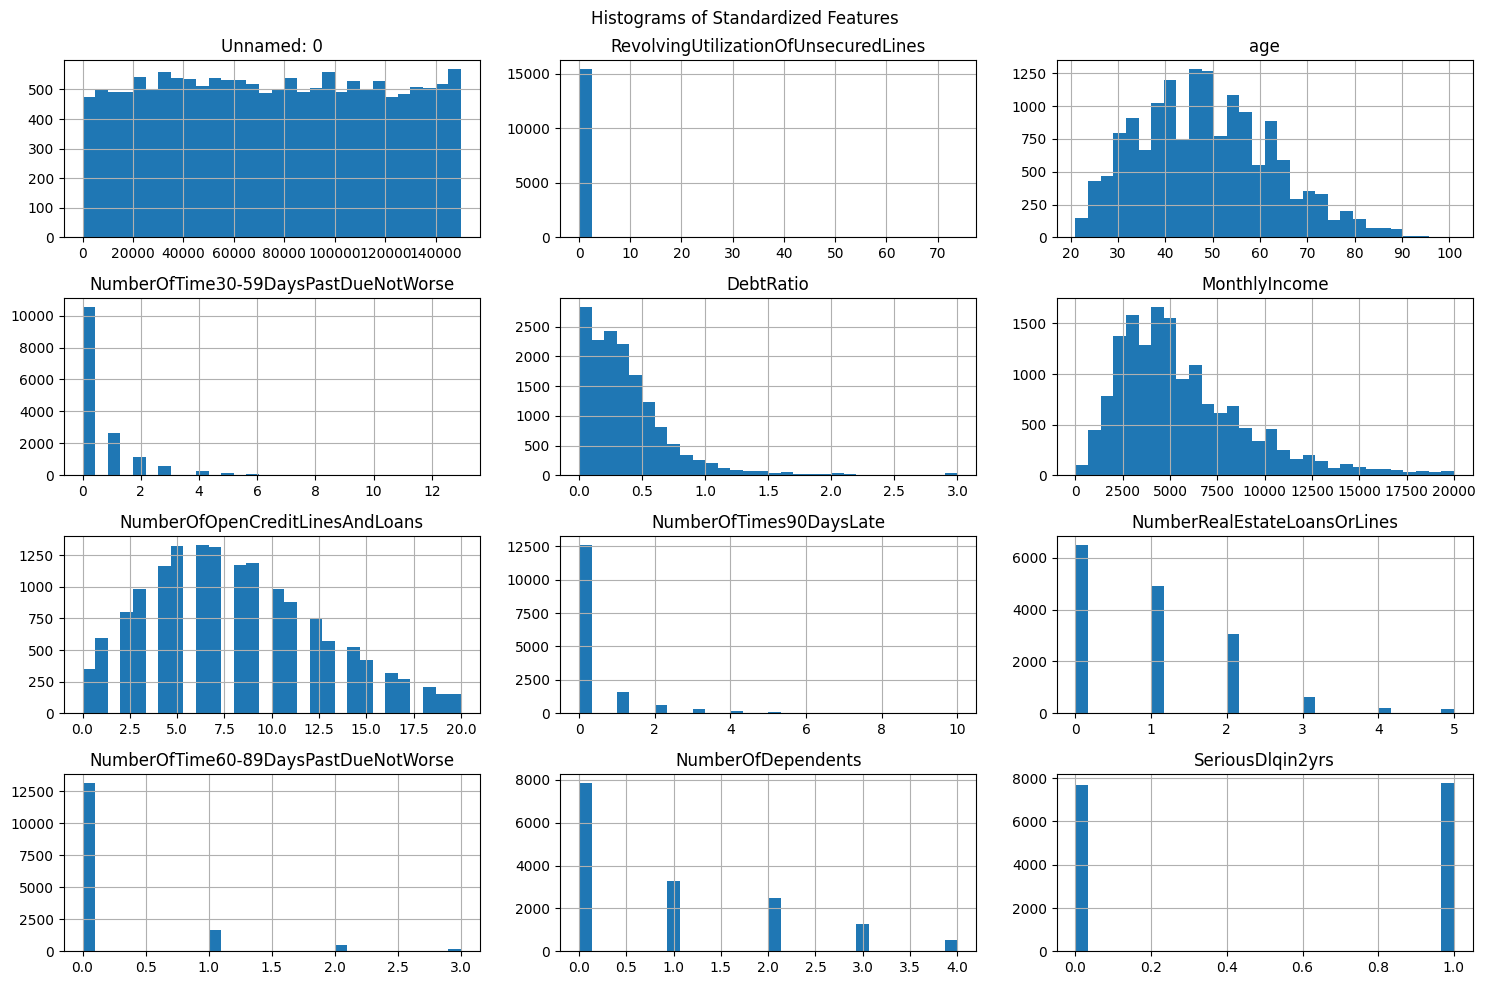

In [15]:
# Visualizing final feature distributions to confirm data integrity 

import matplotlib.pyplot as plt        

sample_df.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Standardized Features')
plt.tight_layout()
plt.show()


## 45. Visualizing Debt Ratio with a Focused Histogram  
Plotted a histogram of `DebtRatio` with a capped range (0–5) to highlight meaningful variation and avoid distortion from outliers.


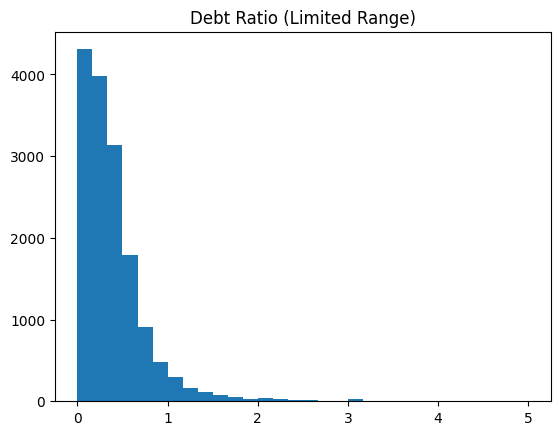

In [72]:

# Plotting a histogram for 'DebtRatio' with a limited range (0 to 5)  
# Focuses on the most relevant values to better understand the feature's distribution  

plt.hist(sample_df['DebtRatio'], bins=30, range=(0, 5))
plt.title('Debt Ratio (Limited Range)')
plt.show()


## 46. Log-Transforming Skewed Features  
Applied `log1p` transformation to heavily skewed numerical features to reduce long tails and improve distribution symmetry for modeling.


In [16]:
# Applying logarithmic transformation (log1p) to skewed features  
# Reduces skewness and normalizes feature distributions for improved model performance  



sample_df['RevolvingUtilizationOfUnsecuredLines'] = np.log1p(sample_df['RevolvingUtilizationOfUnsecuredLines'])
sample_df['DebtRatio'] = np.log1p(sample_df['DebtRatio'])
sample_df['MonthlyIncome'] = np.log1p(sample_df['MonthlyIncome'])
sample_df['NumberOfTimes90DaysLate'] = np.log1p(sample_df['NumberOfTimes90DaysLate'])
sample_df['NumberOfTime30-59DaysPastDueNotWorse'] = np.log1p(sample_df['NumberOfTime30-59DaysPastDueNotWorse'])
sample_df['NumberOfTime60-89DaysPastDueNotWorse'] = np.log1p(sample_df['NumberOfTime60-89DaysPastDueNotWorse'])
sample_df['NumberRealEstateLoansOrLines'] = np.log1p(sample_df['NumberRealEstateLoansOrLines'])



## 47. Verifying Distributions After Log Transformation  
Plotted histograms of all features post-transformation to visually confirm reduced skewness and more normalized distributions.


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'RevolvingUtilizationOfUnsecuredLines'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'NumberOfTime30-59DaysPastDueNotWorse'}>,
        <Axes: title={'center': 'DebtRatio'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: title={'center': 'NumberOfTimes90DaysLate'}>,
        <Axes: title={'center': 'NumberRealEstateLoansOrLines'}>],
       [<Axes: title={'center': 'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <Axes: title={'center': 'NumberOfDependents'}>,
        <Axes: title={'center': 'SeriousDlqin2yrs'}>]], dtype=object)

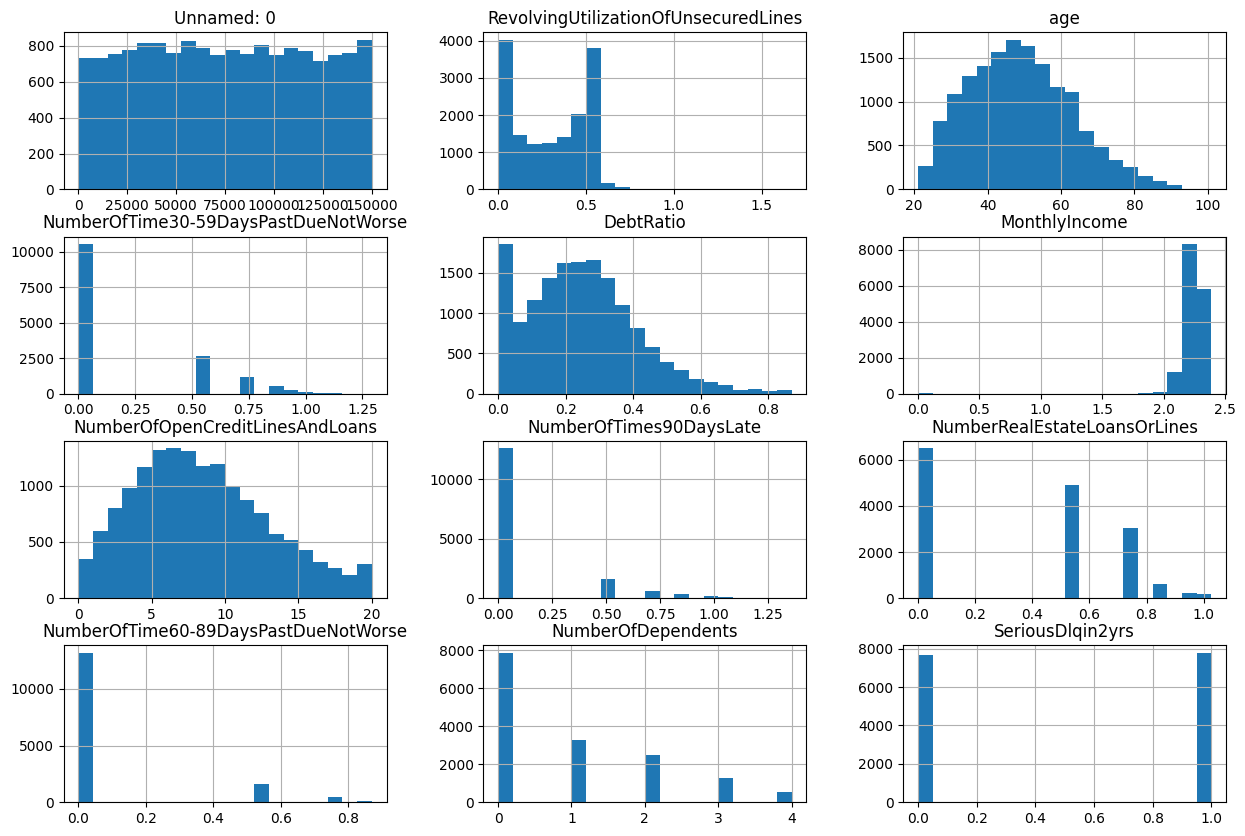

In [77]:
sample_df.hist(bins=20, figsize=(15, 10))
